In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## BACE dataset
The BACE dataset provides quantitative (IC50) and qualitative (binary label) binding results
for a set of inhibitors of human β-secretase 1 (BACE-1). 51 All data are experimental values
reported in scientific literature over the past decade, some with detailed crystal structures
available. We merged a collection of 1522 compounds with their 2D structures and binary
labels in MoleculeNet, built as a classification task. Similarly, regarding a single protein
target, scaffold splitting will be more practically useful.

It has 1513 graphs, 34.1 avarage node per graph, 73.7 avarage edges per graph and 9 features





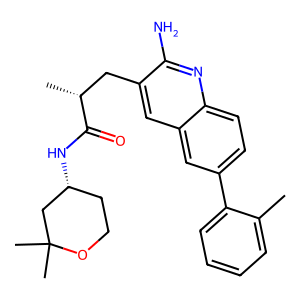

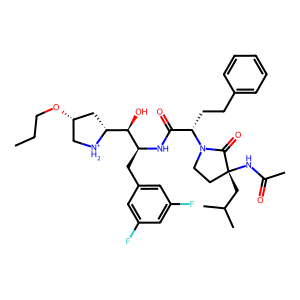

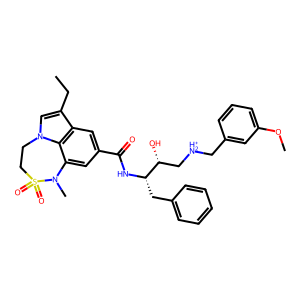

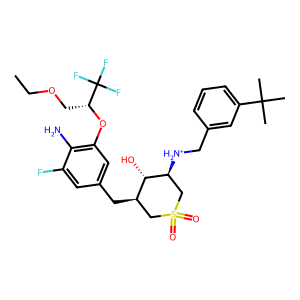

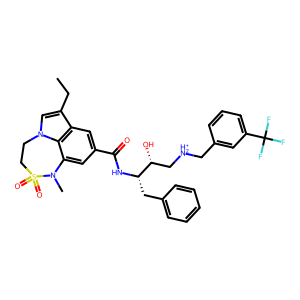

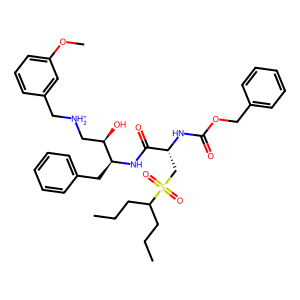

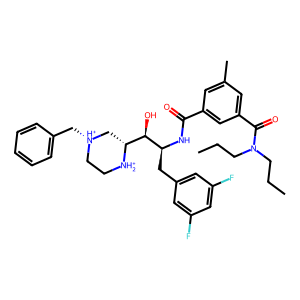

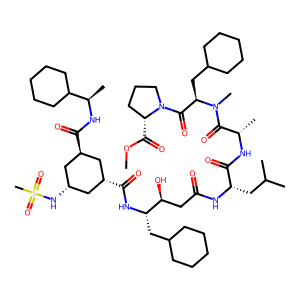

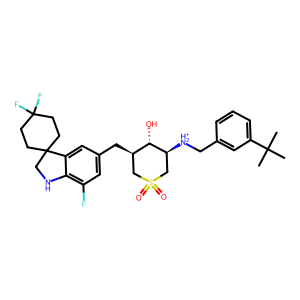

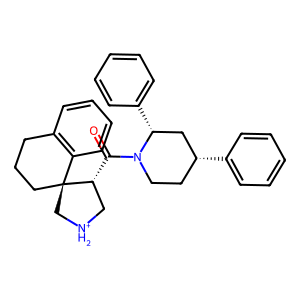

In [33]:
from datasets import get_binary_dataset
from rdkit import Chem
from rdkit.Chem import Draw

def visualize_molecule_from_smiles(smiles):
    mol = Chem.MolFromSmiles(smiles)
    img = Draw.MolToImage(mol, size=(300, 300))
    img.show()

dataset = get_binary_dataset("BACE")

positive_count = 0
negative_count = 0

for i in range(len(dataset)):
    graph = dataset[i]
    label = graph["y"]
    smiles = graph["smiles"]
    
    if label == 1 and positive_count < 5:
        visualize_molecule_from_smiles(smiles)
        positive_count += 1
    elif label == 0 and negative_count < 5:
        visualize_molecule_from_smiles(smiles)
        negative_count += 1
    
    if positive_count >= 5 and negative_count >= 5:
        break
    

In [34]:
import optuna
from functools import partial
from train_with_optuna import objective
from optuna.visualization import plot_optimization_history, plot_param_importances, plot_contour


# Specify the dataset name
dataset_name = 'BACE'  # Adjust as necessary

# Define a partial function that includes the dataset name
objective_with_dataset = partial(objective, dataset_name=dataset_name)

# Create an Optuna study object
study = optuna.create_study(direction='maximize')

# Execute the optimization
study.optimize(objective_with_dataset, n_trials=100)  

# Output the best parameters found
print("Best trial:", study.best_trial.params)

[I 2024-05-04 19:13:40,250] A new study created in memory with name: no-name-88629035-8b80-497a-90df-daf23544b8f8


[I 2024-05-04 19:14:05,379] Trial 0 finished with value: 0.6486376808532365 and parameters: {'lr': 0.0015497551512208842, 'dropout': 0.4259614807459029, 'num_conv_layers': 1, 'num_linear_layers': 1, 'hidden_size': 38}. Best is trial 0 with value: 0.6486376808532365.
[I 2024-05-04 19:14:39,379] Trial 1 finished with value: 0.8061925838289302 and parameters: {'lr': 0.07535556287176695, 'dropout': 0.1984336697835604, 'num_conv_layers': 4, 'num_linear_layers': 2, 'hidden_size': 115}. Best is trial 1 with value: 0.8061925838289302.
[I 2024-05-04 19:15:09,103] Trial 2 finished with value: 0.8001177812754181 and parameters: {'lr': 0.003838157222508595, 'dropout': 0.2142630117440093, 'num_conv_layers': 2, 'num_linear_layers': 2, 'hidden_size': 121}. Best is trial 1 with value: 0.8061925838289302.
[I 2024-05-04 19:15:37,449] Trial 3 finished with value: 0.7293134531216441 and parameters: {'lr': 0.04799095667983228, 'dropout': 0.23627979004985275, 'num_conv_layers': 1, 'num_linear_layers': 1, 'h

Best trial: {'lr': 0.006242798517898967, 'dropout': 0.10061137319396364, 'num_conv_layers': 4, 'num_linear_layers': 2, 'hidden_size': 87}


In [35]:
optimization_history = plot_optimization_history(study)
optimization_history.show()
param_importances = plot_param_importances(study)
param_importances.show()

In [36]:
from train import train_on_datasets
# Define datasets
datasets = [dataset_name]
results = train_on_datasets(None, datasets, best_params=study.best_trial.params)
print(results)

Epoch: 0, Loss: 0.7143, Accuracy: 0.6015, AUC: 0.6868
Epoch: 1, Loss: 0.6510, Accuracy: 0.5730, AUC: 0.6916
Epoch: 2, Loss: 0.6496, Accuracy: 0.6517, AUC: 0.7261
Epoch: 3, Loss: 0.6251, Accuracy: 0.6861, AUC: 0.7475
Epoch: 4, Loss: 0.6300, Accuracy: 0.6543, AUC: 0.7469
Epoch: 5, Loss: 0.6171, Accuracy: 0.7178, AUC: 0.7812
Epoch: 6, Loss: 0.6252, Accuracy: 0.6887, AUC: 0.7636
Epoch: 7, Loss: 0.6207, Accuracy: 0.5618, AUC: 0.6889
Epoch: 8, Loss: 0.6123, Accuracy: 0.7105, AUC: 0.7823
Epoch: 9, Loss: 0.6098, Accuracy: 0.6517, AUC: 0.7738
Epoch: 10, Loss: 0.6072, Accuracy: 0.5406, AUC: 0.7615
Epoch: 11, Loss: 0.5918, Accuracy: 0.6755, AUC: 0.7606
Epoch: 12, Loss: 0.6042, Accuracy: 0.7145, AUC: 0.7875
Epoch: 13, Loss: 0.5923, Accuracy: 0.7098, AUC: 0.7777
Epoch: 14, Loss: 0.5982, Accuracy: 0.6127, AUC: 0.7779
Epoch: 15, Loss: 0.5957, Accuracy: 0.7336, AUC: 0.8200
Epoch: 16, Loss: 0.5890, Accuracy: 0.6629, AUC: 0.7823
Epoch: 17, Loss: 0.5786, Accuracy: 0.6451, AUC: 0.7949
Epoch: 18, Loss: 0.5

Epoch: 39, Loss: 0.4946, Accuracy: 0.7839, AUC: 0.8499
Epoch: 40, Loss: 0.5072, Accuracy: 0.8063, AUC: 0.8825
Epoch: 41, Loss: 0.5010, Accuracy: 0.7931, AUC: 0.8797
Epoch: 42, Loss: 0.4914, Accuracy: 0.7224, AUC: 0.8158
Epoch: 43, Loss: 0.5056, Accuracy: 0.8169, AUC: 0.8880
Epoch: 44, Loss: 0.5016, Accuracy: 0.7832, AUC: 0.8842
Epoch: 45, Loss: 0.4824, Accuracy: 0.8116, AUC: 0.8885
Epoch: 46, Loss: 0.4821, Accuracy: 0.8063, AUC: 0.8881
Epoch: 47, Loss: 0.4865, Accuracy: 0.8136, AUC: 0.8932
Epoch: 48, Loss: 0.4867, Accuracy: 0.8037, AUC: 0.8910
Epoch: 49, Loss: 0.4873, Accuracy: 0.7462, AUC: 0.8368
{'BACE_None': {'train_loss': 0.4873118758280389, 'accuracy': 0.7461996034368804}}


BACE_None


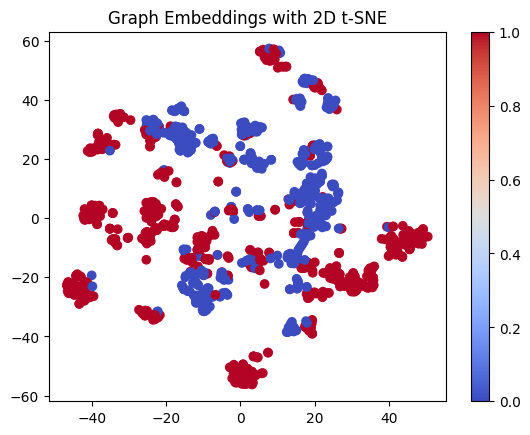

In [37]:
from node_importence import GraphNodeImportance
import torch
from model import GCNStandardSupervised
from torch_geometric.loader import DataLoader
# get first path from results
name = list(results.keys())[0]
print(name)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
path = name + "_full_model.pth"
# load the model
model = torch.load(path)
train_dataset = get_binary_dataset(dataset_name)
save_path = name + "_node_importance.pth"
node_importance = GraphNodeImportance(model, train_dataset, reload_save_path=save_path, p=20, device=device)
node_importance.visualize_graph_embedding_with_2d_tsne()

Visualizing node importance for molecule with positive label and prediction: 1.0000


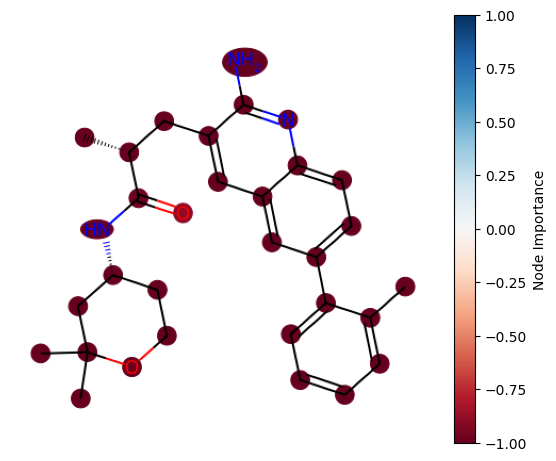

Visualizing node importance for molecule with positive label and prediction: 1.0000


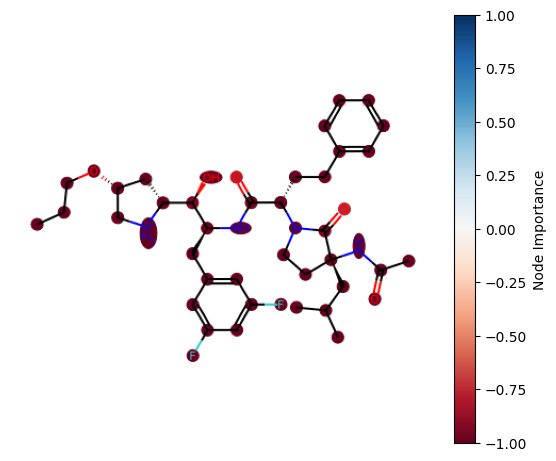

Visualizing node importance for molecule with positive label and prediction: 1.0000


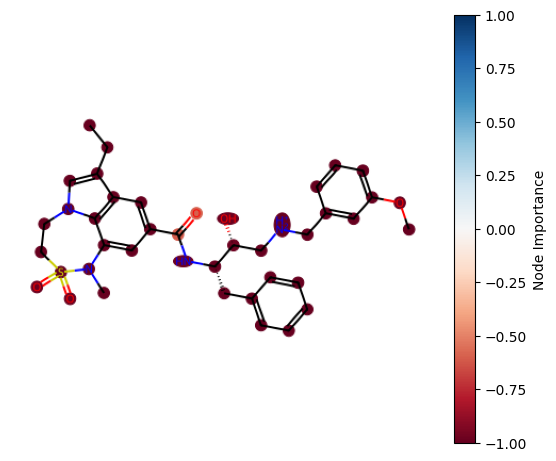

Visualizing node importance for molecule with positive label and prediction: 1.0000


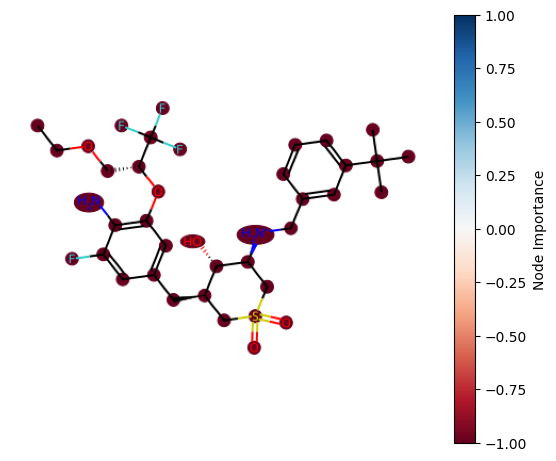

Visualizing node importance for molecule with positive label and prediction: 1.0000


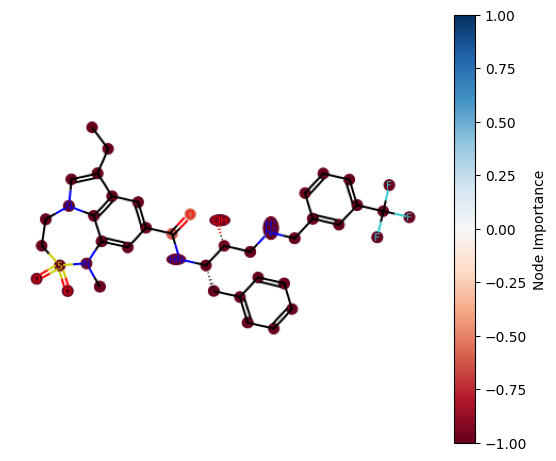

Visualizing node importance for molecule with negative label and prediction: 1.0000


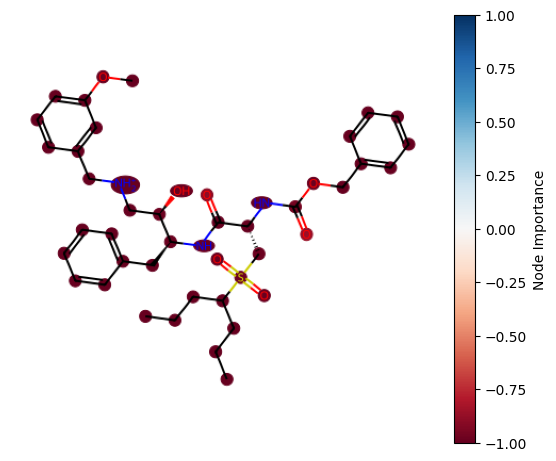

Visualizing node importance for molecule with negative label and prediction: 1.0000


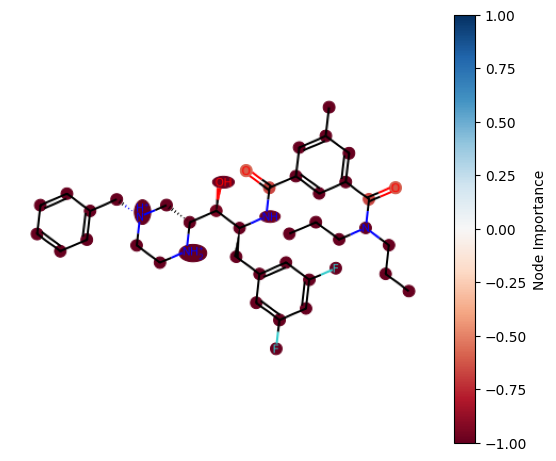

Visualizing node importance for molecule with negative label and prediction: 1.0000


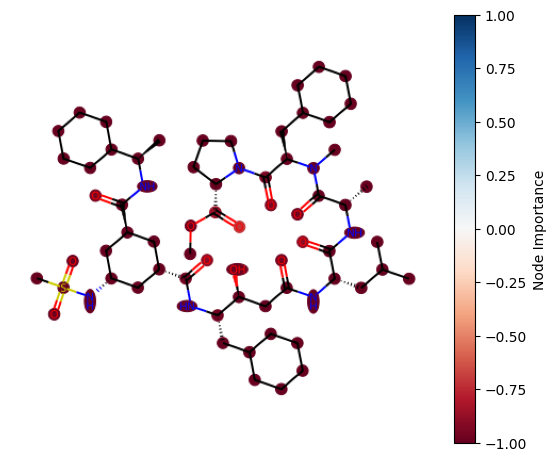

Visualizing node importance for molecule with negative label and prediction: 1.0000


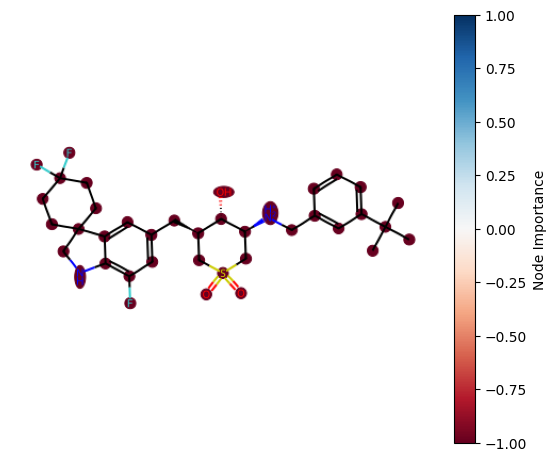

Visualizing node importance for molecule with negative label and prediction: 1.0000


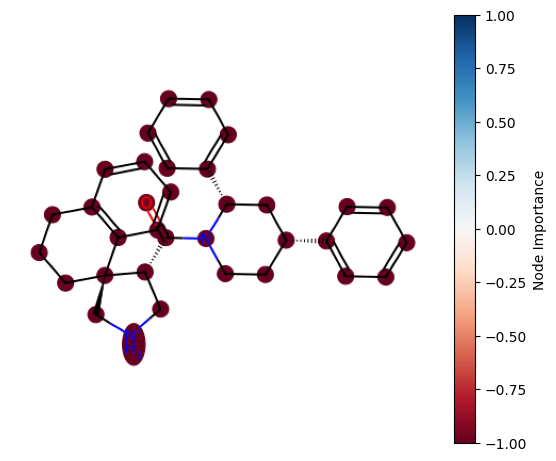

In [38]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import rdMolDraw2D
from PIL import Image
import numpy as np
import io

def visualize_molecule_with_colorbar_rdbu(smiles, importance_scores):
    # Ensure importance_scores is a list or numpy array
    if isinstance(importance_scores, dict):
        importance_scores = [importance_scores[node] for node in sorted(importance_scores.keys())]

    # Convert SMILES to a molecule object
    mol = Chem.MolFromSmiles(smiles)

    # Create a drawer with PNG output (to use with matplotlib)
    d2d = rdMolDraw2D.MolDraw2DCairo(400, 400)

    # Normalization and colormap setup
    norm = Normalize(vmin=-1, vmax=1)
    cmap = plt.cm.RdBu
    mappable = ScalarMappable(norm=norm, cmap=cmap)
    node_colors = mappable.to_rgba(importance_scores)

    # Convert to RGB values for RDKit
    colors = {i: (color[0], color[1], color[2]) for i, color in enumerate(node_colors)}

    # Draw the molecule with the colored atoms and default colored edges
    d2d.DrawMolecule(mol, highlightAtoms=colors.keys(), highlightAtomColors=colors, highlightBonds=[])
    d2d.FinishDrawing()

    # Convert to a PIL Image
    data = d2d.GetDrawingText()
    image = Image.open(io.BytesIO(data))

    # Display the molecule image alongside a colorbar
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(image)
    ax.axis('off')  # Hide axes

    # Create and display the color bar
    sm = ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label('Node Importance')

    plt.show()

model.to('cpu')
positive_count = 0
negative_count = 0
for i in range(len(dataset)):
    graph = dataset[i]
    label = graph["y"]
    smiles = graph["smiles"]    
    if label == 1 and positive_count < 5:
        prediction = model(graph.x, graph.edge_index, None).detach().cpu().numpy().item()
        print(f"Visualizing node importance for molecule with positive label and prediction: {prediction > 0.5:.4f}")
        node_scores = node_importance.calculate_node_importance(graph, i)
        visualize_molecule_with_colorbar_rdbu(smiles, node_scores)
        positive_count += 1
    elif label == 0 and negative_count < 5:
        prediction = model(graph.x, graph.edge_index, None).detach().cpu().numpy().item()
        print(f"Visualizing node importance for molecule with negative label and prediction: {prediction > 0.5:.4f}")
        node_scores = node_importance.calculate_node_importance(graph, i)
        visualize_molecule_with_colorbar_rdbu(smiles, node_scores)
        negative_count += 1
    
    if positive_count >= 5 and negative_count >= 5:
        break

In [39]:
from evaluation import evaluate_model_with_importance

def explanation_method_node_importance(model, graph_data, graph_idx):
    return node_importance.explanation_method(graph_data, graph_idx)

eval_results = evaluate_model_with_importance(
    model, dataset, explanation_method_node_importance, "NLE Importance", node_importance.pred_labels, is_NLE=True)


/home/shay/.local/lib/python3.10/site-packages/torch_geometric/deprecation.py:26: UserWarning:

'data.DataLoader' is deprecated, use 'loader.DataLoader' instead

  2%|▏         | 25/1513 [00:46<48:26,  1.95s/it]

100%|██████████| 1513/1513 [13:45<00:00,  1.83it/s]

NLE Importance - Evaluation Results: {'fidelity': 0.5822868473231989, 'perturbation_impact': 0.4177131005966025, 'accuracy': 0.7461996034368804, 'stability': 0.4177126865156896}


In [40]:
from baselines import explanation_method_gnnexplainer, explanation_method_gradcam, explanation_method_random
eval_results_random = evaluate_model_with_importance(model, dataset, explanation_method_random, "Random", node_importance.pred_labels)
print(eval_results_random)

  9%|▉         | 135/1513 [00:01<00:14, 93.03it/s]

100%|██████████| 1513/1513 [00:16<00:00, 94.31it/s]

Random - Evaluation Results: {'fidelity': 0.5822868473231989, 'perturbation_impact': 0.41771315094342076, 'accuracy': 0.7461996034368804, 'stability': 0.4177131265973068}
{'fidelity': 0.5822868473231989, 'perturbation_impact': 0.41771315094342076, 'accuracy': 0.7461996034368804, 'stability': 0.4177131265973068}


In [41]:
eval_results_gnnexplainer = evaluate_model_with_importance(model, dataset, explanation_method_gnnexplainer, "GNNExplainer", node_importance.pred_labels)
print(eval_results_gnnexplainer)

  8%|▊         | 117/1513 [00:45<09:22,  2.48it/s]

100%|██████████| 1513/1513 [09:38<00:00,  2.61it/s]

GNNExplainer - Evaluation Results: {'fidelity': 0.5822868473231989, 'perturbation_impact': 0.4177131241548164, 'accuracy': 0.7461996034368804, 'stability': 0.41771313455509806}
{'fidelity': 0.5822868473231989, 'perturbation_impact': 0.4177131241548164, 'accuracy': 0.7461996034368804, 'stability': 0.41771313455509806}


In [42]:
eval_results_gradcam = evaluate_model_with_importance(model, dataset, explanation_method_gradcam, "GradCAM", node_importance.pred_labels)
print(eval_results_gradcam)

  2%|▏         | 30/1513 [00:00<00:26, 56.69it/s]

100%|██████████| 1513/1513 [00:25<00:00, 59.10it/s]

GradCAM - Evaluation Results: {'fidelity': 0.5822868473231989, 'perturbation_impact': 0.4177017873750171, 'accuracy': 0.7461996034368804, 'stability': 0.4177131247063465}
{'fidelity': 0.5822868473231989, 'perturbation_impact': 0.4177017873750171, 'accuracy': 0.7461996034368804, 'stability': 0.4177131247063465}


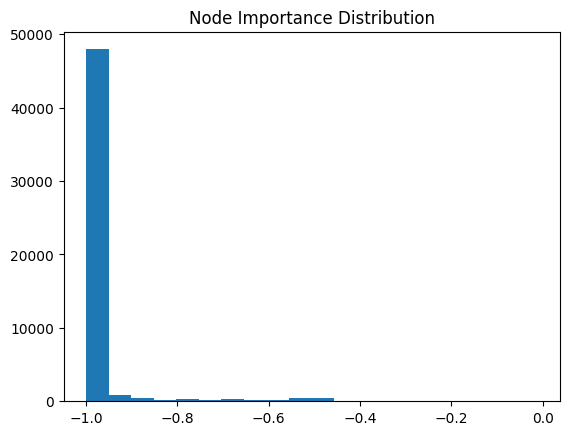

In [43]:
node_importance.histogram_node_importance_distribution()

In [44]:
print(len(node_importance.pred_labels))
print(sum(node_importance.pred_labels))

1513
881.0


/home/shay/.local/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



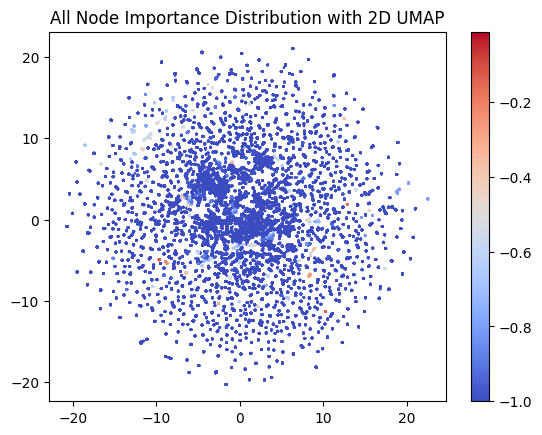

In [45]:
node_importance.visualize_all_node_importance_distribution(add_graph_embedding=False)

/home/shay/.local/lib/python3.10/site-packages/umap/umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



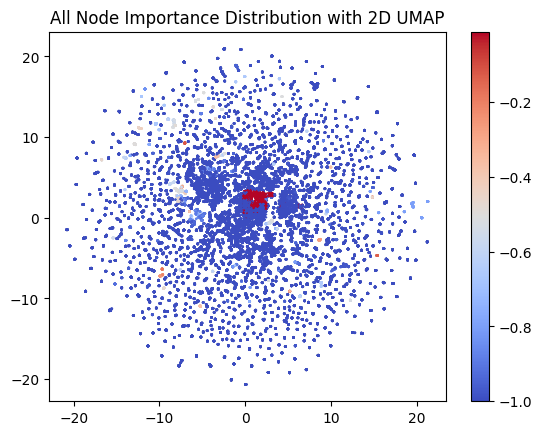

In [46]:
node_importance.visualize_all_node_importance_distribution(add_graph_embedding=True)